In [1]:
# Increasing jupyter notebook width sizes

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [137]:
# Import necessary python libraries

import pandas as pd
import numpy as np
# importing pandas profile
import pandas_profiling
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style = "ticks")
from pylab import rcParams
rcParams['figure.figsize'] = 15,10  # rcParams for plot rendering attributes
rcParams['font.size'] = 15
rcParams['axes.facecolor'] = 'white' # plott 
import matplotlib as mpl
mpl.rc('lines', linewidth=5, color='r')# Reference: https://matplotlib.org/api/matplotlib_configuration_api.html#matplotlib.rcParams

In [6]:
# Reading file

churn = pd.read_csv("Feature_Engg_before_scaling.csv")

In [8]:
churn.shape

(4617, 14)

In [108]:
churn.columns

Index(['Account_Length', 'Vmail_Message', 'Day_Mins', 'Day_Calls', 'Eve_Mins',
       'Eve_Calls', 'Night_Mins', 'Night_Calls', 'International_Mins',
       'International_Calls', 'CustServ_Calls', 'VMail_Plan_ yes',
       'International_plan_ yes', 'Churn_ True.'],
      dtype='object')

# Separating dependent and independent variables



In [9]:
# separating our independent and dependent variable
X = churn.drop(['Churn_ True.'], axis = 1)
y = churn['Churn_ True.']

# Splitting the training data

X_train and y_train first used to train the algorithm.
then, X_test is used in that trained algorithms to predict outcomes.
Once we get the outcomes, we compare it with y_test
By comparing the outcome of the model with y_test, we can determine whether our algorithms are performing well or not. As we compare we use confusion matrix and accuracy to determine different aspects of model performance.

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = .20, random_state = 42)

# Feature Scaling

In [11]:
headers = X_train.columns 

X_train.head()

,Account_Length,Vmail_Message,Day_Mins,Day_Calls,Eve_Mins,Eve_Calls,Night_Mins,Night_Calls,International_Mins,International_Calls,CustServ_Calls,VMail_Plan_ yes,International_plan_ yes
3189,76,0,246.8,110,206.3,63,208.4,123,13.2,5,0,0,1
2646,101,0,232.7,114,186.4,123,153.3,122,11.5,6,5,0,0
506,136,31,143.1,88,236.6,65,227.8,120,11.4,5,2,1,0
393,112,0,217.1,76,205.2,100,185.7,91,9.4,3,2,0,0
1183,154,32,192.3,82,165.3,134,205.0,74,9.0,1,2,1,0


In [12]:
## We will be using standardscaler to transform
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

## transforming "train_x"
X_train = sc.fit_transform(X_train)

## transforming "test_x"
X_test = sc.transform(X_test)

In [ ]:
# Saving the file

Our dataset is an imblanced as 85% of customer's churn rate is False. An algoritnm that always predicts that False and achieve good accuracy. We need to make balance one for avoiding biased result. Applying SMOTE Technique.

In [17]:
# Getting imblearn library for applying SMOTE

from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_sample(X_train,y_train)

In [18]:
# Checking the counts
from collections import Counter
print(Counter(y_train))

Counter({0: 3162, 1: 531})


In [19]:
# Checking the counts after SMOTE
print(Counter(y_train_smote))

Counter({1: 3162, 0: 3162})


# Model
 

### Logistic Regression

In [111]:
# Import model libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance
import warnings
warnings.filterwarnings(action='ignore')


In [112]:
## fit the model with "X_train" and "y_train"
## Once the model is trained we want to find out how well the model is performing, so we test the model. 
## we use "X_test" portion of the data (this data was not used to fit the model) to predict model outcome. 
## Once predicted we save that outcome in "pred" variable.
## Then we compare the predicted value( "pred") and actual value("y_test") to see how well our model is performing. 

In [113]:
lr = LogisticRegression(random_state = 42)
lr.fit(X_train_smote, y_train_smote)
lpredict = lr.predict(X_test)


In [114]:
# Printing the accuracy score
print(classification_report(y_test, lpredict))
print(confusion_matrix(y_test, lpredict))
l = round(accuracy_score(y_true = y_test, y_pred = lpredict) * 100, 2)
print("Accuracy:", l)

              precision    recall  f1-score   support

           0       0.96      0.74      0.83       799
           1       0.32      0.78      0.45       125

    accuracy                           0.74       924
   macro avg       0.64      0.76      0.64       924
weighted avg       0.87      0.74      0.78       924

[[588 211]
 [ 27  98]]
Accuracy: 74.24


### Decision Tree

In [115]:
decisiontree = DecisionTreeClassifier(criterion='entropy', random_state = 42)
decisiontree.fit(X_train_smote, y_train_smote)
dpredict = decisiontree.predict(X_test)


In [116]:
# Printing the accuracy score
print(classification_report(y_test, dpredict))
print(confusion_matrix(y_test, dpredict))
d = round(accuracy_score(y_true = y_test, y_pred = dpredict) * 100, 2)
print("Accuracy:", d)

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       799
           1       0.59      0.76      0.67       125

    accuracy                           0.90       924
   macro avg       0.78      0.84      0.80       924
weighted avg       0.91      0.90      0.90       924

[[734  65]
 [ 30  95]]
Accuracy: 89.72


### Random Forrest

In [117]:
rf = RandomForestClassifier(random_state = 42, criterion='entropy')
rf.fit(X_train_smote, y_train_smote)
rpredict = rf.predict(X_test)

In [118]:
# Printing the accuracy score
print(classification_report(y_test, rpredict))
print(confusion_matrix(y_test, rpredict))
r = round(accuracy_score(y_true = y_test, y_pred = rpredict) * 100, 2)
print("Accuracy:", r)

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       799
           1       0.79      0.71      0.75       125

    accuracy                           0.94       924
   macro avg       0.88      0.84      0.86       924
weighted avg       0.93      0.94      0.93       924

[[776  23]
 [ 36  89]]
Accuracy: 93.61


### Naives Bayes

In [119]:
nb = GaussianNB()
nb.fit(X_train_smote, y_train_smote)
nbpredict = nb.predict(X_test)

In [120]:
# Printing the accuracy score
print(classification_report(y_test, nbpredict))
print(confusion_matrix(y_test, nbpredict))
n = round(accuracy_score(y_true = y_test, y_pred = nbpredict) * 100, 2)
print("Accuracy:", n)

              precision    recall  f1-score   support

           0       0.95      0.81      0.87       799
           1       0.38      0.74      0.50       125

    accuracy                           0.80       924
   macro avg       0.66      0.77      0.69       924
weighted avg       0.87      0.80      0.82       924

[[646 153]
 [ 33  92]]
Accuracy: 79.87


### Support Vector Machine

In [121]:
svc = SVC(random_state = 42)
svc.fit(X_train_smote, y_train_smote)
spredict = svc.predict(X_test)

In [122]:
# Printing the accuracy score
print(classification_report(y_test, spredict))
print(confusion_matrix(y_test, spredict))
s = round(accuracy_score(y_true = y_test, y_pred = spredict) * 100, 2)
print("Accuracy:", s)

              precision    recall  f1-score   support

           0       0.96      0.91      0.93       799
           1       0.56      0.76      0.64       125

    accuracy                           0.89       924
   macro avg       0.76      0.83      0.79       924
weighted avg       0.91      0.89      0.89       924

[[724  75]
 [ 30  95]]
Accuracy: 88.64


### K Nearest Neighbors

In [123]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_smote, y_train_smote)
kpredict = knn.predict(X_test)

In [124]:
# Printing the accuracy score
print(classification_report(y_test, kpredict))
print(confusion_matrix(y_test, kpredict))
k = round(accuracy_score(y_true = y_test, y_pred = kpredict) * 100, 2)
print("Accuracy:", k)

              precision    recall  f1-score   support

           0       0.95      0.80      0.87       799
           1       0.36      0.74      0.49       125

    accuracy                           0.79       924
   macro avg       0.66      0.77      0.68       924
weighted avg       0.87      0.79      0.82       924

[[636 163]
 [ 32  93]]
Accuracy: 78.9


### Stochastic Gradient Boosting

In [125]:
sgd = SGDClassifier(random_state = 42)
sgd.fit(X_train_smote, y_train_smote)
sgpredict = sgd.predict(X_test)

In [126]:
# Printing the accuracy score
print(classification_report(y_test, sgpredict))
print(confusion_matrix(y_test, sgpredict))
sg = round(accuracy_score(y_true = y_test, y_pred = sgpredict) * 100, 2)
print("Accuracy:", sg)

              precision    recall  f1-score   support

           0       0.95      0.73      0.82       799
           1       0.31      0.78      0.44       125

    accuracy                           0.73       924
   macro avg       0.63      0.75      0.63       924
weighted avg       0.87      0.73      0.77       924

[[580 219]
 [ 28  97]]
Accuracy: 73.27


### Gradient Boosting Classifier

In [127]:
gbk = GradientBoostingClassifier(random_state = 42)
gbk.fit(X_train_smote, y_train_smote)
gbpredict = gbk.predict(X_test)

In [128]:
# Printing the accuracy score
print(classification_report(y_test, gbpredict))
print(confusion_matrix(y_test, gbpredict))
gb = round(accuracy_score(y_true = y_test, y_pred = gbpredict) * 100, 2)
print("Accuracy:", gb)

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       799
           1       0.72      0.81      0.76       125

    accuracy                           0.93       924
   macro avg       0.84      0.88      0.86       924
weighted avg       0.94      0.93      0.93       924

[[759  40]
 [ 24 101]]
Accuracy: 93.07


### XG Booster

In [129]:
xg = XGBClassifier(random_state = 42)
xg.fit(X_train_smote, y_train_smote)
xpredict = xg.predict(X_test)


In [130]:
# Printing the accuracy score
print(classification_report(y_test, xpredict))
print(confusion_matrix(y_test, xpredict))
xgb = round(accuracy_score(y_true = y_test, y_pred = xpredict) * 100, 2)
print("Accuracy:", xgb)

              precision    recall  f1-score   support

           0       0.97      0.94      0.96       799
           1       0.69      0.80      0.74       125

    accuracy                           0.93       924
   macro avg       0.83      0.87      0.85       924
weighted avg       0.93      0.93      0.93       924

[[755  44]
 [ 25 100]]
Accuracy: 92.53


In [131]:
print("Logistic Regression - Accuracy:", l)
print("XG Booster - Accuracy:", xgb)
print("Gradient Boosting Classifier - Accuracy:", gb)
print("Random Forest - Accuracy:", r)
print("Decision Tree - Accuracy:", d)
print("KNN - Accuracy:", k)
print("Support Vector Machines - Accuracy:", s)
print("Naive Bayes - Accuracy:", n)
print("Stochastic Gradient Descent - Accuracy:", sg)

Logistic Regression - Accuracy: 74.24
XG Booster - Accuracy: 92.53
Gradient Boosting Classifier - Accuracy: 93.07
Random Forest - Accuracy: 93.61
Decision Tree - Accuracy: 89.72
KNN - Accuracy: 78.9
Support Vector Machines - Accuracy: 88.64
Naive Bayes - Accuracy: 79.87
Stochastic Gradient Descent - Accuracy: 73.27


Random Forest came as a best model among all the models followed by Gradient Boosting. Tuning the Random Forest model.

# Cross Validation

In [132]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf, X, y, cv = 20, scoring = 'accuracy')
print(scores)
print(scores.mean())

[0.93965517 0.96536797 0.93939394 0.92640693 0.93073593 0.93073593
 0.95238095 0.95670996 0.95238095 0.94805195 0.92640693 0.93073593
 0.93506494 0.96103896 0.96103896 0.93506494 0.94347826 0.93913043
 0.94347826 0.95217391]
0.9434715596747081


# Hyperparameter Tuning

In [104]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

params= {'n_estimators':np.arange(1,200),
         'random_state': np.arange(1,200),
         'criterion': ['entropy','gini'],
          'max_features':['auto','sqrt','log2'],
         'bootstrap':[True, False]
          }
model = RandomizedSearchCV(RandomForestClassifier(),params)
model.fit(X_train_smote, y_train_smote)


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs

In [105]:
model.best_score_

0.9623655913978495

In [106]:
model.best_params_

{'random_state': 56,
 'n_estimators': 120,
 'max_features': 'auto',
 'criterion': 'entropy',
 'bootstrap': False}

In [107]:
model.best_estimator_

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=120,
                       n_jobs=None, oob_score=False, random_state=56, verbose=0,
                       warm_start=False)

In [154]:
# Checking ROC 
df = model.predict_proba(X_test)

In [155]:
prob = pd.DataFrame(df)

In [157]:
prob.head(10)

,0,1
0,0.975000,0.025000
1,0.958333,0.041667
2,0.983333,0.016667
3,0.983333,0.016667
4,0.608333,0.391667
5,0.883333,0.116667
6,1.000000,0.000000
7,0.300000,0.700000
8,0.983333,0.016667
9,0.900000,0.100000


In [161]:
# Finding the churn rates. We need to keep the second column as it describes the churn rate
churnrate = prob.iloc[:,1]

In [162]:
churnrate.head(10)

0    0.025000
1    0.041667
2    0.016667
3    0.016667
4    0.391667
5    0.116667
6    0.000000
7    0.700000
8    0.016667
9    0.100000
Name: 1, dtype: float64

In [168]:
fpr, tpr , thresholds = roc_curve(y_test,churnrate)

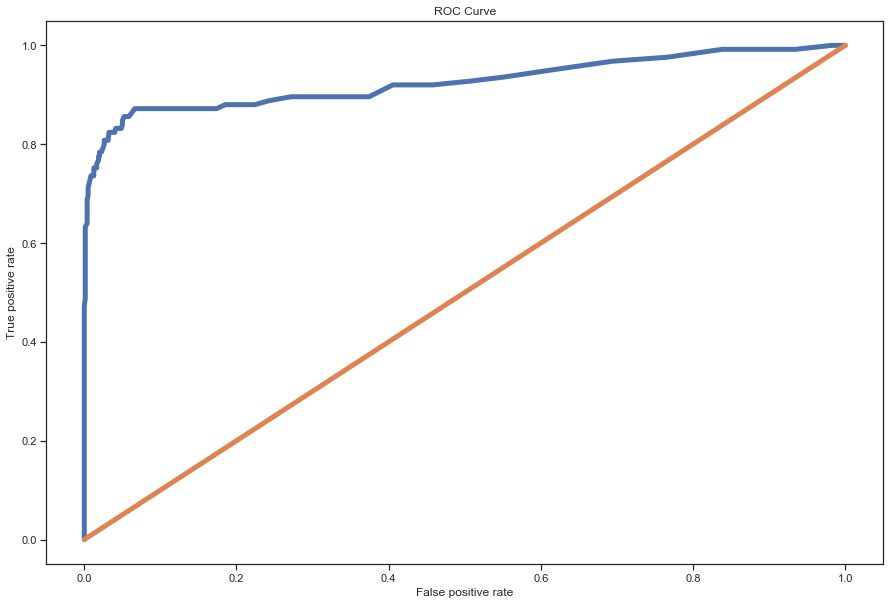

In [169]:
plt.plot(fpr,tpr)
plt.xlabel("False positive rate")
plt.title("ROC Curve")
plt.ylabel("True positive rate")
plt.plot([0,1],[0,1], "-")
plt.show()

In [170]:
auc_score = roc_auc_score(y_test, churnrate)

In [171]:
auc_score

0.9257972465581977

# Our AUC score is 92% from the above model. 

# Feature vs Influence on model

In [191]:
import pandas as pd
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

In [201]:
feature_importances

,importance
Day_Mins,0.222555
CustServ_Calls,0.156814
International_Calls,0.091016
International_plan_ yes,0.086210
Eve_Mins,0.084615
International_Mins,0.068420
Night_Mins,0.058946
Account_Length,0.050267
Day_Calls,0.049742
Night_Calls,0.045623


Text(0.5, 1.0, 'Feature Importances')

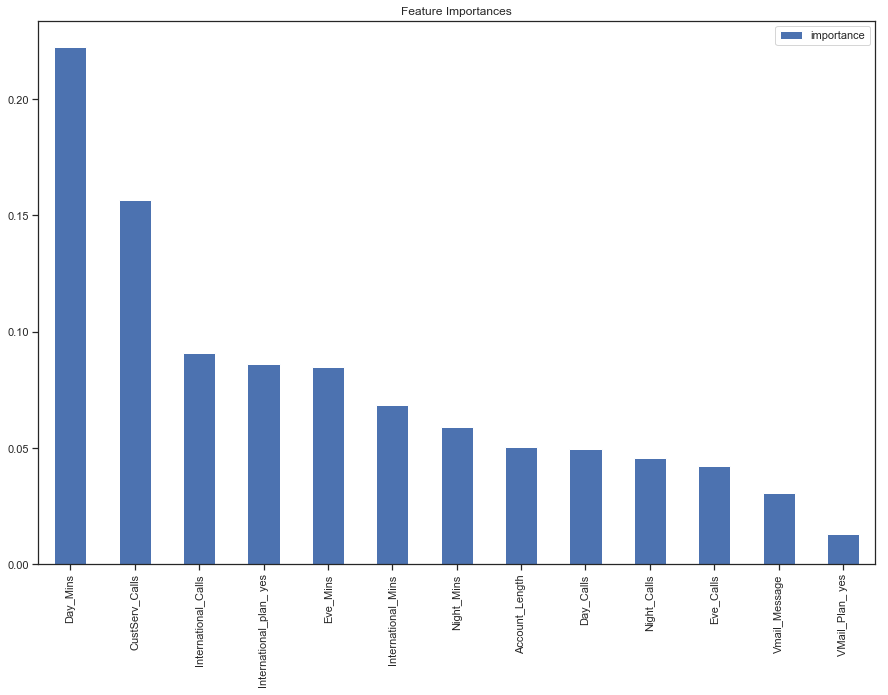

In [226]:
feature_importances.sort_values('importance', ascending=False).plot(kind = 'bar')
plt.title ("Feature Importances")

In [174]:
from sklearn.externals import joblib

In [176]:
# Dump the Model
joblib.dump(model,'Telcomchurn.ml')

['Telcomchurn.ml']